In [1]:
import numpy as np
import pandas as pd
import plotnine as gg
import textwrap

In [2]:
appearances = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-16/ewf_appearances.csv')
matches = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-16/ewf_matches.csv')
standings = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-07-16/ewf_standings.csv')

In [8]:
# Rather than average attendance, investigate the aggregate; total attendance for each season

data = matches[['season', 'attendance']].copy()

# Filter for seasons from 2018-2019 onwards; when Women's Super League was formed.
seasons = data['season'].unique()
seasons = seasons[8:]

# Filter for data only from 2018
data = data[data['season'].isin(seasons)]

In [9]:
data = (data
        .groupby('season', as_index=False)
        .agg({'attendance': 'sum'})
        .rename(columns={'season': 'Season', 'attendance': 'Attendance'})
)

In [41]:
# Take mean between 2019-2020 and 2021-2020 for season 2020-2021 (no attendance data recorded)
data.loc[data['Season'] == '2020-2021', 'Attendance'] = (data.loc[data['Season'] == '2019-2020', 'Attendance'].item() + data.loc[data['Season'] == '2021-2022', 'Attendance'].item()) / 2

In [12]:
# Values for annotations
idx = matches['attendance'].idxmax()
max_attendance = matches.loc[idx, 'attendance']

In [150]:
# Define background colour, text colour, and body font
bg_col = '#FFFFFA'
text_col = '#0D5C63'
body_font = 'Arial'

In [157]:
# title, subtitle
title_text = "Attendance at English Women's Football"
st = "Total attendance for the Women's Super League has increased more than ten-fold in the last five seasons."
wrapped_subtitle = '\n'.join(textwrap.wrap(st, width=55))

In [61]:
# caption
cap = "Source: English Women's Football (EWF) Database\nGraphic: Matt Humphrey"

In [76]:
x_breaks = np.linspace(0, 5, num=6)
x_labs = data['Season'].to_list()

In [57]:
y_breaks = np.linspace(0, 1_000_000, num=5)
y_labs = ['0', '250,000', '500,000', '750,000', '1,000,000']

In [152]:
y1 = int(data.loc[0, 'Attendance'])
y2 = int(data.loc[5, 'Attendance'])
y3 = int(data.loc[2, 'Attendance'])

In [82]:
data.reset_index(inplace=True)

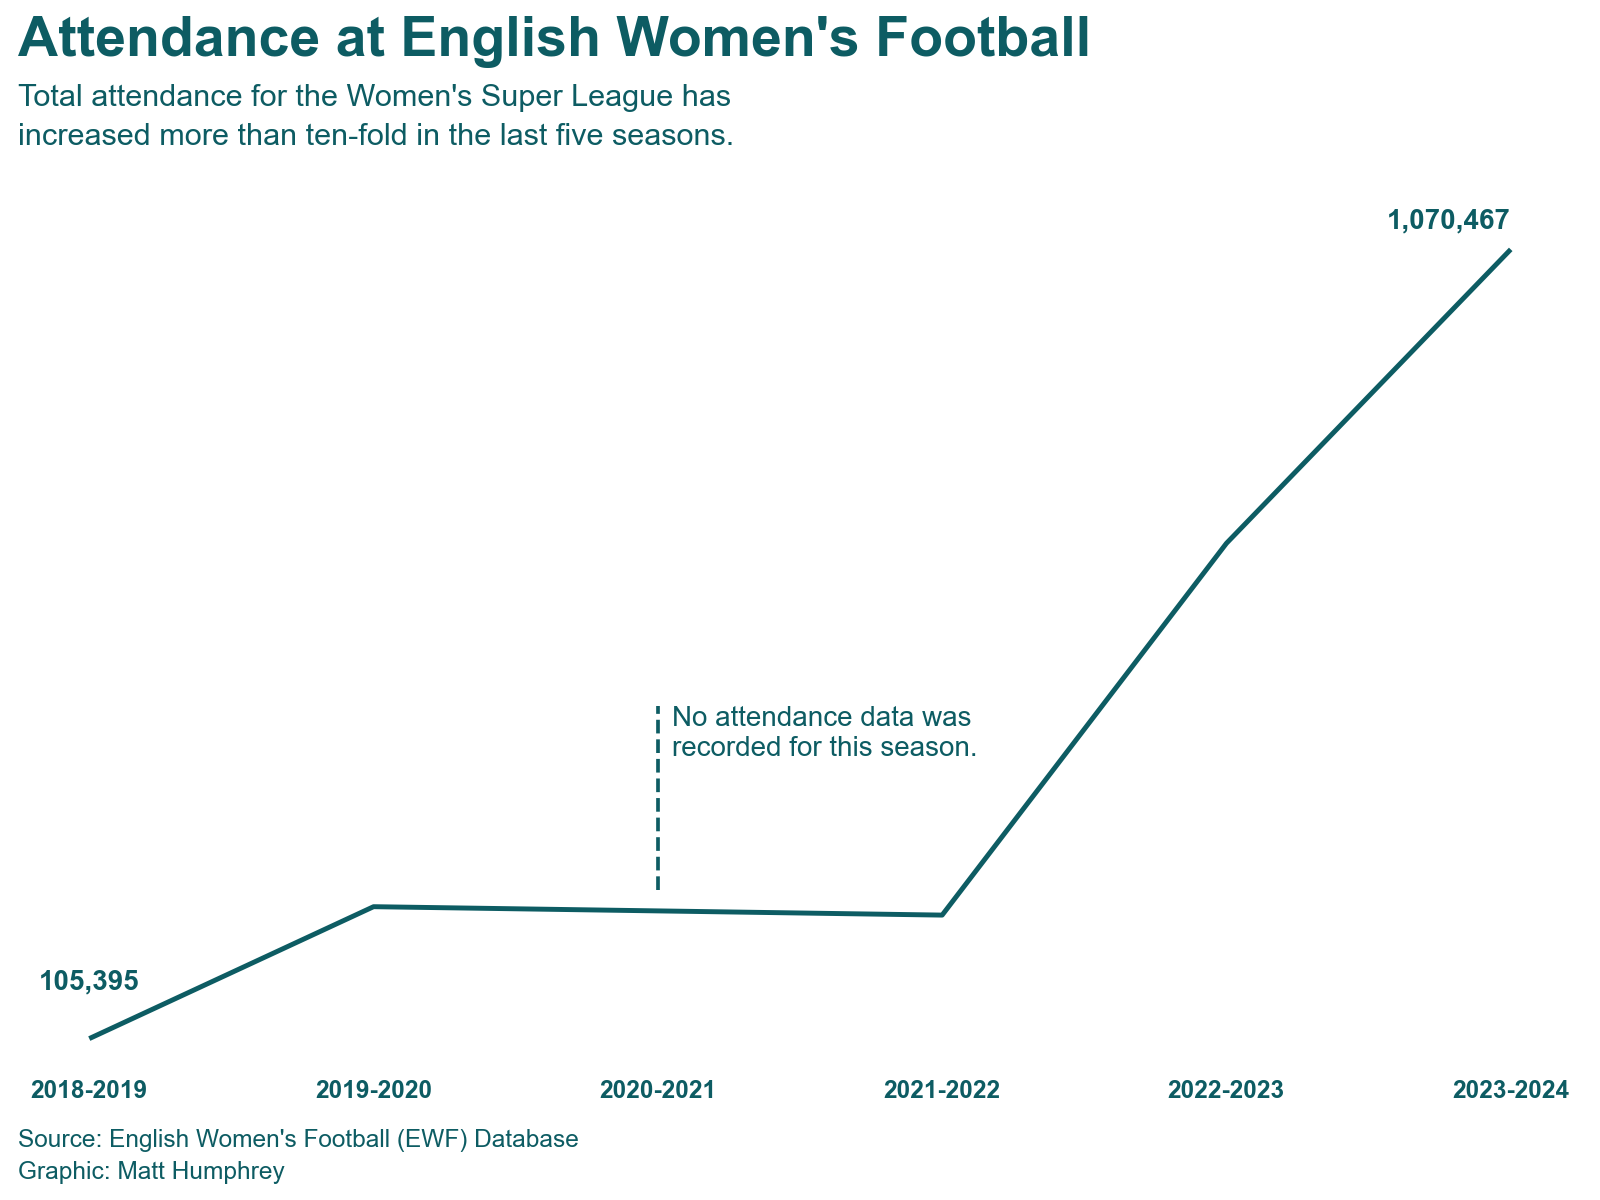

In [173]:
(gg.ggplot(data, gg.aes(x='index', y='Attendance'))
    + gg.geom_line(group=1, size=1, color=text_col) 
    + gg.labs(
        title=title_text,
        x='',
        y='',
        subtitle=wrapped_subtitle,
        caption=cap,
    )

    # Adjust axes labels
    + gg.scale_x_continuous(breaks=x_breaks, labels=x_labs) 
    + gg.scale_y_continuous(breaks=y_breaks, labels=y_labs)

    # Annotation 1
    + gg.annotate(
         'text',
         x=0, y=y1+ 85_000,
         label=f"{y1:,}",
         color=text_col,
         family=body_font,
         ha='center',
         va='top',
         size=10,
         fontweight='bold'
    )

    # Annotation 2
    + gg.annotate(
         'text',
         x=5, y=y2 + 50_000,
         label=f"{y2:,}",
         color=text_col,
         family=body_font,
         ha='right',
         va='top',
         size=10,
         fontweight='bold'
    )

    # Annotation 3
    + gg.annotate(
         'segment',
         x=2, xend=2,
         y=y3 + 25_000, yend=y3 + 250_000,
         size=0.75,
         color=text_col,
         linetype='dashed'
    )
    + gg.annotate(
         'text',
         x=2.05, y=y3 + 250_000,
         label='No attendance data was\nrecorded for this season.',
         color=text_col,
         family=body_font,
         ha='left',
         size=10,
         va='top'
    )
    
    # Theme
    + gg.theme_classic() 
    + gg.theme(
        # Y-axis
        axis_line_y=gg.element_blank(),
        axis_ticks_major_y=gg.element_blank(),
        axis_text_y=gg.element_blank(),
        # X-axis
        axis_line_x=gg.element_blank(),
        axis_ticks_major_x=gg.element_blank(),
        axis_text_x=gg.element_text(weight='bold'),
        # Metadata
        plot_caption=gg.element_text(ha="left", margin={"t": 2, "units": "lines"}),
        plot_title=gg.element_text(family=body_font, size=20, weight='semibold'),
        text=gg.element_text(family=body_font, linespacing=1.5, color=text_col),
        figure_size=(8, 6),
    )
 )